In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('retail_store_inventory.csv')
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,01-01-2022,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,01-01-2022,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,01-01-2022,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,01-01-2022,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,01-01-2022,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [4]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Store ID            73100 non-null  object        
 2   Product ID          73100 non-null  object        
 3   Category            73100 non-null  object        
 4   Region              73100 non-null  object        
 5   Inventory Level     73100 non-null  int64         
 6   Units Sold          73100 non-null  int64         
 7   Units Ordered       73100 non-null  int64         
 8   Demand Forecast     73100 non-null  float64       
 9   Price               73100 non-null  float64       
 10  Discount            73100 non-null  int64         
 11  Weather Condition   73100 non-null  object        
 12  Holiday/Promotion   73100 non-null  int64         
 13  Competitor Pricing  73100 non-null  float64   

In [5]:
df.set_index('Date', inplace=True)

monthly_sales = df['Units Sold'].resample('M').sum()

monthly_sales.head()

/tmp/ipython-input-3974447429.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Units Sold'].resample('M').sum()


,Units Sold
Date,
2022-01-31,419938
2022-02-28,391052
2022-03-31,426073
2022-04-30,407380
2022-05-31,414799


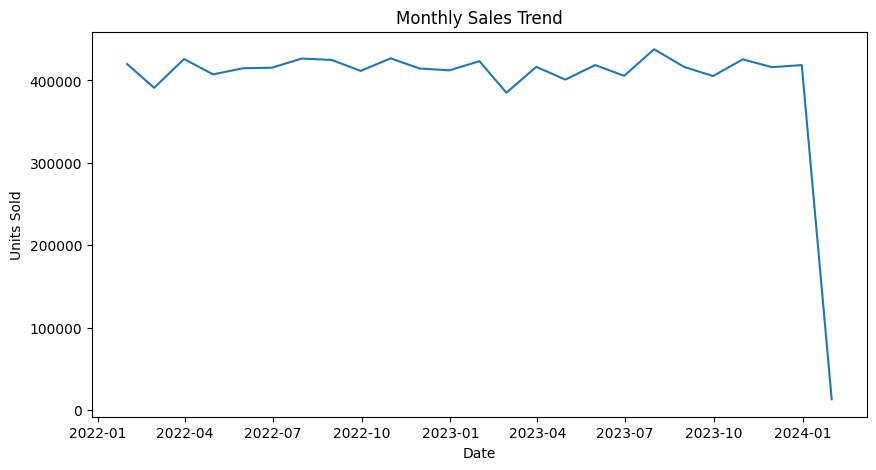

In [6]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales)
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()

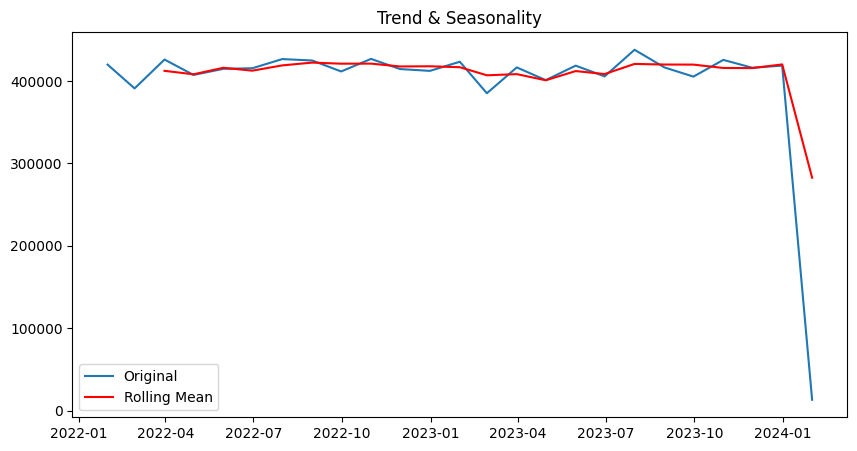

In [7]:
rolling_mean = monthly_sales.rolling(window=3).mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales, label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.legend()
plt.title("Trend & Seasonality")
plt.show()

In [9]:
train = monthly_sales[:int(0.8*len(monthly_sales))]
test = monthly_sales[int(0.8*len(monthly_sales)):]
print(len(train), len(test))

20 5


In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train, trend='add', seasonal=None)
model_fit = model.fit()

In [11]:
forecast = model_fit.forecast(steps=len(test))

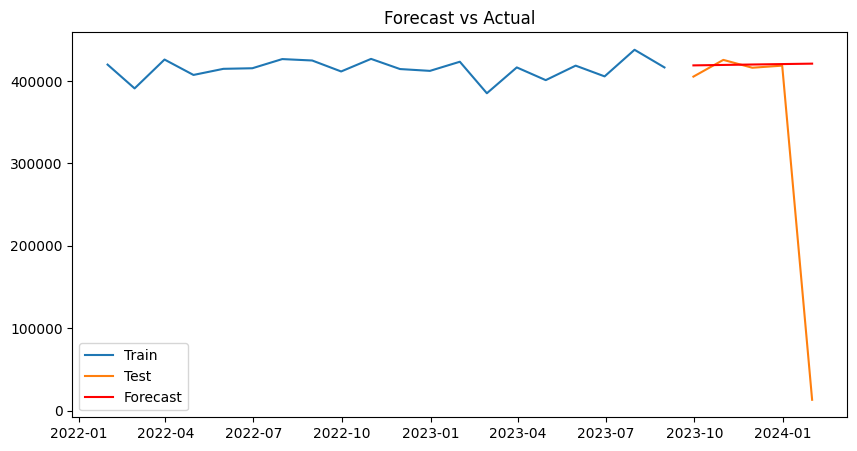

In [12]:
plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.title("Forecast vs Actual")
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test, forecast)

mape = (abs((test - forecast) / test).mean()) * 100

print("MAE:", mae)
print("MAPE:", mape)

MAE: 86684.87574083173
MAPE: 617.1469703867442


In [14]:
forecast_df = pd.DataFrame({
    'Actual': test,
    'Forecast': forecast
})

forecast_df.to_csv('forecast_output.csv')

In [18]:
from google.colab import files
files.download('forecast_output.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
with open('forecast_report.txt', 'w') as f:
    f.write(f"Forecast Report\n")
    f.write(f"MAE: {mae}\n")
    f.write(f"MAPE: {mape}\n")

    files.download('forecast_report.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>